In [18]:
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import datetime as dt
import pandas_datareader as web
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

In [3]:
style.use('ggplot')

In [36]:
%matplotlib notebook
plt.ioff()

In [5]:
start = dt.datetime(2000, 1, 1)
end   = dt.datetime(2017, 7, 25)

In [6]:
df = web.DataReader('AAPL','yahoo',start, end, retry_count=5)

In [7]:
df.to_csv('Data/AAPL.csv', sep=',')

In [8]:
df1 = pd.read_csv('Data/AAPL.csv', sep=',', index_col=0, parse_dates=True)

In [15]:
# df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()

In [40]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [27]:
df_ohlc.head()

,open,high,low,close
Date,,,,
1999-12-31,3.303425,3.596616,3.052405,3.196992
2000-01-10,3.140763,3.423914,2.801384,3.423914
2000-01-20,3.646819,3.646819,3.265270,3.265270
2000-01-30,3.333547,3.691000,3.174902,3.691000
2000-02-09,3.618706,3.823538,3.494199,3.574527


In [28]:
df_volume.head()

/home/akash/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called head(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


Date
1999-12-31    134125600.0
2000-01-10    157234400.0
2000-01-20    156990400.0
2000-01-30    115504800.0
2000-02-09     80283350.0
Freq: 10D, Name: Volume, dtype: float64

In [31]:
df_ohlc.reset_index(inplace=True)

In [32]:
df_ohlc.head()

,Date,open,high,low,close
0,1999-12-31,3.303425,3.596616,3.052405,3.196992
1,2000-01-10,3.140763,3.423914,2.801384,3.423914
2,2000-01-20,3.646819,3.646819,3.265270,3.265270
3,2000-01-30,3.333547,3.691000,3.174902,3.691000
4,2000-02-09,3.618706,3.823538,3.494199,3.574527


In [33]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

In [34]:
df_ohlc.head()

,Date,open,high,low,close
0,730119.0,3.303425,3.596616,3.052405,3.196992
1,730129.0,3.140763,3.423914,2.801384,3.423914
2,730139.0,3.646819,3.646819,3.265270,3.265270
3,730149.0,3.333547,3.691000,3.174902,3.691000
4,730159.0,3.618706,3.823538,3.494199,3.574527


/home/akash/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
.resample() is now a deferred operation
You called index(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  """
/home/akash/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
.resample() is now a deferred operation
You called values(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  """


<IPython.core.display.Javascript object>


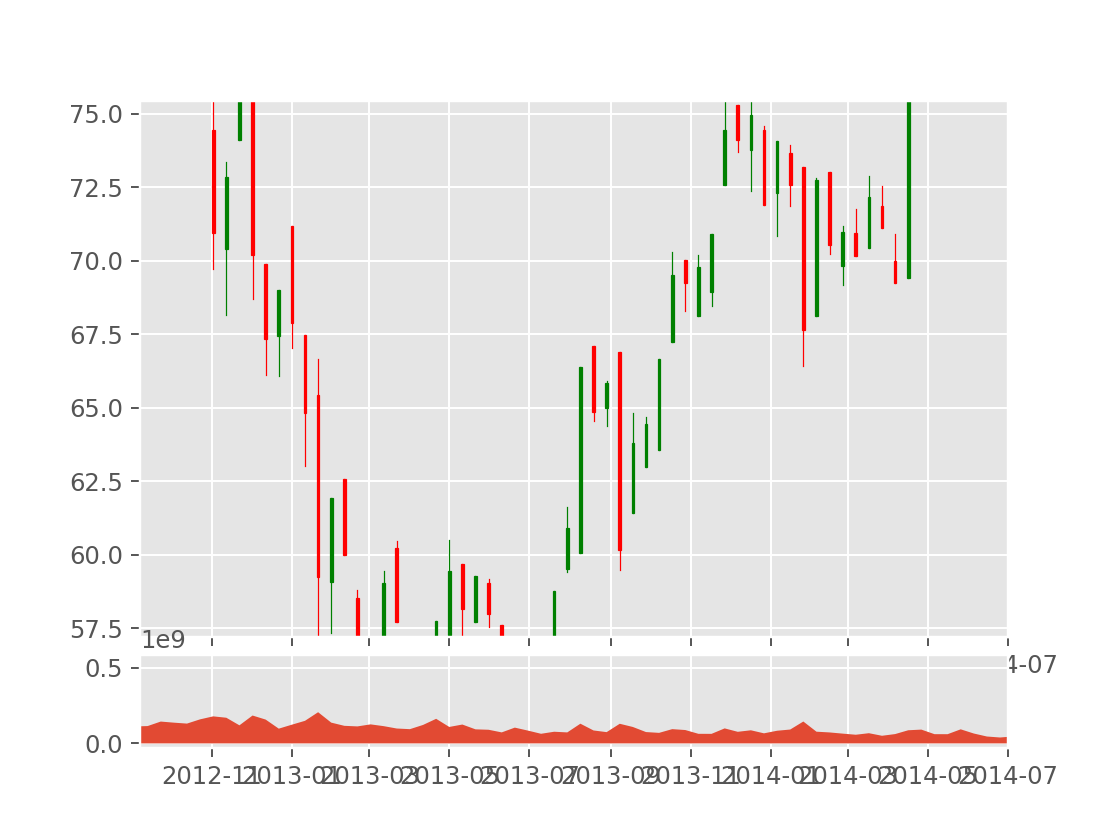

In [38]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex = ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()